# BANK CHURN PREDICTION | Data Preparation & Visualization Insight

This project's aim is to predict whether the customer left the bank (closed his account) or he continues to be a customer.<br>
[Datasets Source](https://www.kaggle.com/shrutimechlearn/churn-modelling)

## Importing Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

## Importing Dataset

Read the `Churn_Modelling.csv` into a dataframe `data`

In [2]:
data = pd.read_csv("Churn_Modelling.csv")
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


#### Getting info from the datasets

Features in the imported datasets :
- `RowNumber` : showing the row numbers from each data
- `CustomerId` : unique ID for Bank Customer Identification
- `Surname` : bank customer's last name
- `CreditScore` : credit score of the customer
- `Geography` : the country from which the customer belongs
- `Gender` : bank customer's gender
- `Age` : bank customer's age
- `Tenure` : number of years for which the customer has been with the bank
- `Balance` : bank balance of the customer
- `NumOfProducts` : number of bank products the customer is utilising
- `HasCrCard` : a binary information whether the customer holds a credit card (1) or not (0)
- `IsActiveMember` : a binary information whether the customer is an active member (1) or not (0)
- `EstimatedSalary` : estimated salary of the customer in USD
- `Exited` : a binary information whether the customer is exited (1) or retained (0)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


There's no NaN value in datasets

#### Drop Several Features

Features that could be ignored :
- `RowNumber`
- `CustomerId`
- `Surname`

In [4]:
datadrop = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
datadrop

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
datadrop.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


<hr>

## Data Visualization

Looking for comparison between exited and retained Bank customers

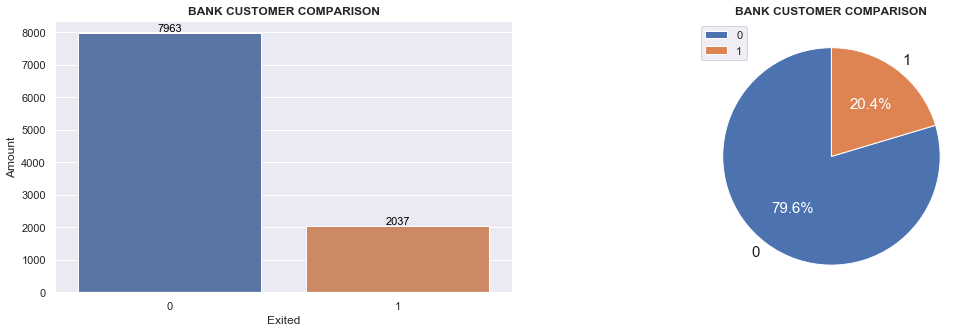

In [31]:
val = datadrop.loc[:,"Exited"].value_counts()
ind = datadrop["Exited"].value_counts().sort_index().index

plt.figure(figsize=[18,5])

plt.subplot(121)
plt.title("BANK CUSTOMER COMPARISON", size= 12, fontweight="bold")
sb.set(style="darkgrid")
mark = sb.barplot(x= ind, y= val, data= datadrop, ci=None)
for p in mark.patches:
             mark.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha="center", va="center", fontsize=11, color="black", rotation=0, xytext=(0, 5),
                 textcoords="offset points")
plt.xlabel("Exited")
plt.ylabel("Amount")

plt.subplot(122)
x,y,z = plt.pie (val, labels=ind, startangle=90,
        shadow= False,textprops={"size":15, "color":"k"},
        autopct = "%1.1f%%", radius=1)
plt.title("BANK CUSTOMER COMPARISON", size= 12, fontweight="bold")
for i in z:
    i.set_color("white")
plt.legend(ind)

        
plt.show()

#### COMPARING CATEGORICAL DATA

Getting insight from the categorical data

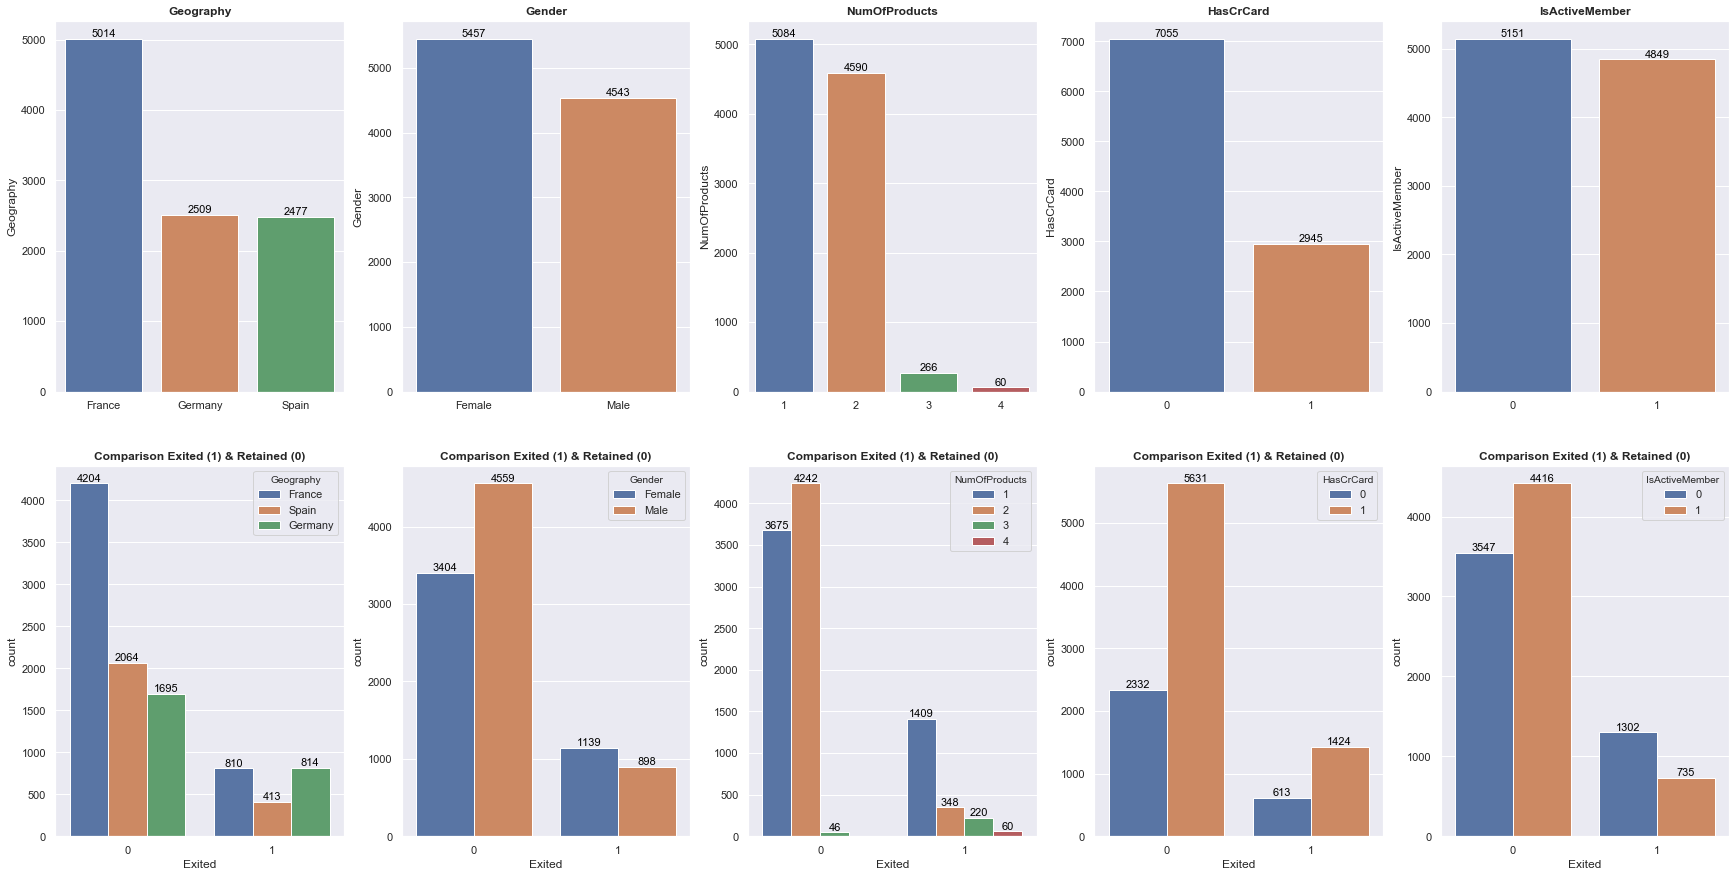

In [32]:
column = ["Geography", "Gender", "NumOfProducts", "HasCrCard", "IsActiveMember"]

sb.set(style = "darkgrid")
fig = plt.figure(figsize = (30,15))

for i in range(len(column)):    
    val = datadrop.loc[:,column[i]].value_counts()
    ind = datadrop[column[i]].value_counts().sort_index().index
    
    ax1 = fig.add_subplot(2, 5, i+1)
    ax1.set_title(column[i], fontweight="bold")

    ax2 = fig.add_subplot(2, 5, 6+i)
    ax2.set_title("Comparison Exited (1) & Retained (0)", fontweight="bold")

    mark1 = sb.barplot(x = ind, y = val, ax= ax1 )
    for p in mark1.patches:
                 mark1.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha="center", va="center", fontsize=11, color="black", rotation=0, xytext=(0, 5),
                     textcoords="offset points")
    mark2 = sb.countplot(x = "Exited", hue = column[i], data = datadrop, ax = ax2)
    for p in mark2.patches:
                 mark2.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha="center", va="center", fontsize=11, color="black", rotation=0, xytext=(0, 5),
                     textcoords="offset points")

In [57]:
dtEx = datadrop[datadrop["Exited"] == 1]
dtRet = datadrop[datadrop["Exited"] == 0]

In [56]:
feat = "Geography"

valEx = dtEx.loc[:,feat].value_counts()
valRet = dtRet.loc[:, feat].value_counts()

geo = pd.DataFrame()
geo["Retain"] = valRet
geo["Exit"] = valEx
geo["%Exit"] = valEx * 100 / (len(datadrop))
geo

,Retain,Exit,%Exit
France,4204,810,8.10
Spain,2064,413,4.13
Germany,1695,814,8.14


In [62]:
feat = "Gender"

valEx = dtEx.loc[:,feat].value_counts()
valRet = dtRet.loc[:, feat].value_counts()

gen = pd.DataFrame()
gen["Retain"] = valRet
gen["Exit"] = valEx
gen["%Exit"] = round((valEx * 100 / (valEx + valRet)), 2)
gen

,Retain,Exit,%Exit
Male,4559,898,16.46
Female,3404,1139,25.07


In [74]:
feat = "NumOfProducts"

valEx = dtEx.loc[:,feat].value_counts()
valRet = dtRet.loc[:, feat].value_counts()

pro = pd.DataFrame()
pro["Exit"] = valEx
pro["Retain"] = valRet
pro.fillna(0, inplace=True)
pro["%Exit"] = round((valEx * 100 / (valEx + valRet)), 2)
pro

,Exit,Retain,%Exit
1,1409,3675.0,27.71
2,348,4242.0,7.58
3,220,46.0,82.71
4,60,0.0,NaN


In [71]:
feat = "HasCrCard"

valEx = dtEx.loc[:,feat].value_counts()
valRet = dtRet.loc[:, feat].value_counts()

pro = pd.DataFrame()
pro["Retain"] = valRet
pro["Exit"] = valEx
pro["%Exit"] = round((valEx * 100 / (valEx + valRet)), 2)
pro

,Retain,Exit,%Exit
1,5631,1424,20.18
0,2332,613,20.81


In [73]:
feat = "IsActiveMember"

valEx = dtEx.loc[:,feat].value_counts()
valRet = dtRet.loc[:, feat].value_counts()

pro = pd.DataFrame()
pro["Retain"] = valRet
pro["Exit"] = valEx
pro["%Exit"] = round((valEx * 100 / (valEx + valRet)), 2)
pro

,Retain,Exit,%Exit
1,4416,735,14.27
0,3547,1302,26.85


### Getting insight from the Numerical Data

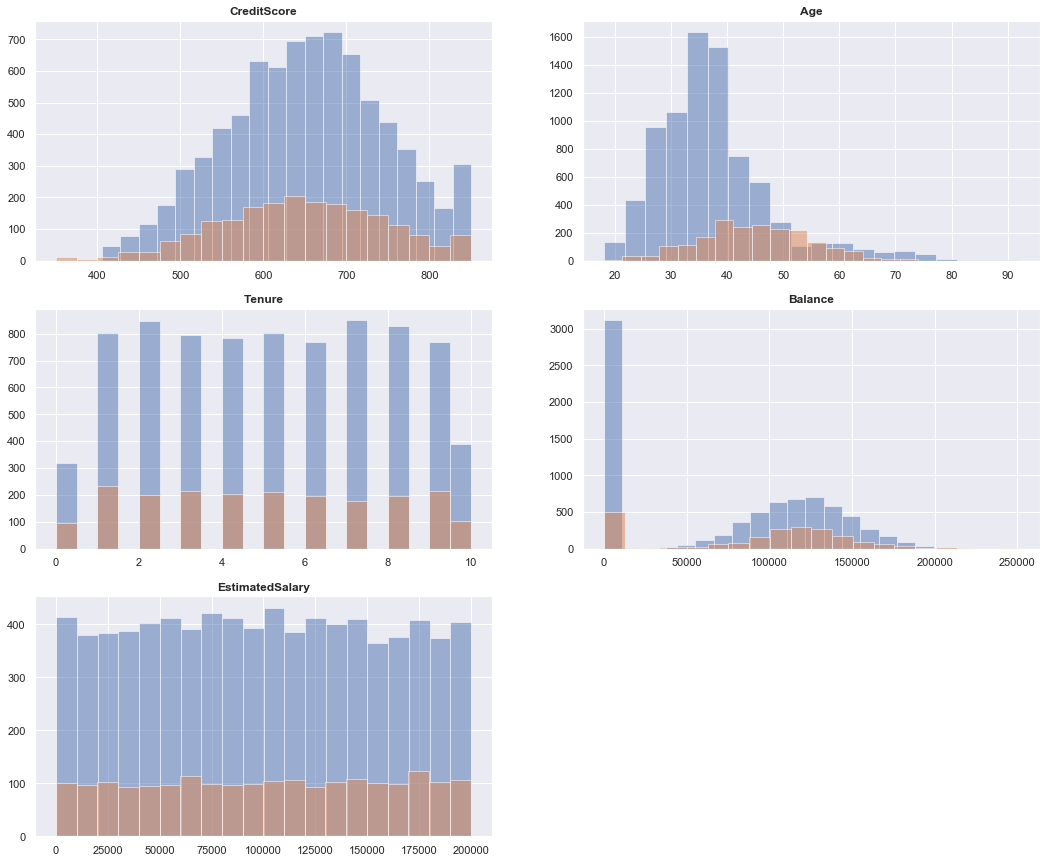

In [34]:
col = ["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]
sb.set(style = "darkgrid")
fig = plt.figure(figsize = (18,15))

for i in range(len(col)):
    a = fig.add_subplot(3, 2, i+1)
    a.set_title(col[i], fontweight="bold")
    datadrop[col[i]][datadrop["Exited"] == 0].hist(bins = 20, alpha = 0.5)
    datadrop[col[i]][datadrop["Exited"] == 1].hist(bins = 20, alpha = 0.5)

In [40]:
dtEx = datadrop[datadrop["Exited"] == 1]
dtRet = datadrop[datadrop["Exited"] == 0]

#### Credit Score

In [41]:
mx = datadrop["CreditScore"].max()
mn = datadrop["CreditScore"].min()
ranges = np.arange(mn, mx + round((mx-mn)/10), round((mx-mn)/10))

crs = pd.DataFrame()
crs["Retain"] = round(dtRet["Exited"].groupby(pd.cut(dtRet["CreditScore"], ranges)).count())
crs["Exit"] = round(dtEx["Exited"].groupby(pd.cut(dtEx["CreditScore"], ranges)).count())
crs["%Exit"] = round((crs["Exit"] * 100/(crs["Retain"] + crs["Exit"])), 2)
crs.T

CreditScore,"(350.0, 400.0]","(400.0, 450.0]","(450.0, 500.0]","(500.0, 550.0]","(550.0, 600.0]","(600.0, 650.0]","(650.0, 700.0]","(700.0, 750.0]","(750.0, 800.0]","(800.0, 850.0]"
Retain,0.0,128.00,363.00,762.00,1148.00,1479.00,1586.00,1212.00,767.00,518.00
Exit,14.0,42.00,91.00,216.00,297.00,392.00,361.00,306.00,186.00,127.00
%Exit,100.0,24.71,20.04,22.09,20.55,20.95,18.54,20.16,19.52,19.69


#### Age

In [42]:
mx = datadrop["Age"].max()
mn = datadrop["Age"].min()
ranges = np.arange(mn, mx + round((mx-mn)/9), round((mx-mn)/9))

age = pd.DataFrame()
age["Retain"] = round(dtRet["Exited"].groupby(pd.cut(dtRet["Age"], ranges)).count())
age["Exit"] = round(dtEx["Exited"].groupby(pd.cut(dtEx["Age"], ranges)).count())
age["%Exit"] = round((age["Exit"] * 100/(age["Retain"] + age["Exit"])), 2)
age.T

Age,"(18.0, 26.0]","(26.0, 34.0]","(34.0, 42.0]","(42.0, 50.0]","(50.0, 58.0]","(58.0, 66.0]","(66.0, 74.0]","(74.0, 82.0]","(82.0, 90.0]","(90.0, 98.0]"
Retain,731.00,2638.00,2885.00,991.00,287.00,210.0,148.00,47.0,4.0,2.0
Exit,58.00,230.00,542.00,642.00,386.00,149.0,27.00,0.0,1.0,0.0
%Exit,7.35,8.02,15.82,39.31,57.36,41.5,15.43,0.0,20.0,0.0


#### Tenure

In [43]:
mx = datadrop["Tenure"].max()
mn = datadrop["Tenure"].min()
ranges = np.arange(mn, mx + round((mx-mn)/9), round((mx-mn)/9))

tnr = pd.DataFrame()
tnr["Retain"] = round(dtRet["Exited"].groupby(pd.cut(dtRet["Tenure"], ranges)).count())
tnr["Exit"] = round(dtEx["Exited"].groupby(pd.cut(dtEx["Tenure"], ranges)).count())
tnr["%Exit"] = round((tnr["Exit"] * 100/(tnr["Retain"] + tnr["Exit"])), 2)
tnr.T

Tenure,"(0.0, 1.0]","(1.0, 2.0]","(2.0, 3.0]","(3.0, 4.0]","(4.0, 5.0]","(5.0, 6.0]","(6.0, 7.0]","(7.0, 8.0]","(8.0, 9.0]","(9.0, 10.0]"
Retain,803.00,847.00,796.00,786.00,803.00,771.00,851.00,828.00,771.00,389.00
Exit,232.00,201.00,213.00,203.00,209.00,196.00,177.00,197.00,213.00,101.00
%Exit,22.42,19.18,21.11,20.53,20.65,20.27,17.22,19.22,21.65,20.61


#### Balance

In [44]:
mx = datadrop["Balance"].max()
mn = datadrop["Balance"].min()
ranges = np.arange(mn, mx + round((mx-mn)/10), round((mx-mn)/10))

blc = pd.DataFrame()
blc["Retain"] = round(dtRet["Exited"].groupby(pd.cut(dtRet["Balance"], ranges)).count())
blc["Exit"] = round(dtEx["Exited"].groupby(pd.cut(dtEx["Balance"], ranges)).count())
blc["%Exit"] = round((blc["Exit"] * 100/(blc["Retain"] + blc["Exit"])), 2)
blc.T

Balance,"(0.0, 25090.0]","(25090.0, 50180.0]","(50180.0, 75270.0]","(75270.0, 100360.0]","(100360.0, 125450.0]","(125450.0, 150540.0]","(150540.0, 175630.0]","(175630.0, 200720.0]","(200720.0, 225810.0]","(225810.0, 250900.0]"
Retain,2.00,47.00,280.00,948.00,1521.00,1319.0,573.0,143.00,13.00,0.0
Exit,4.00,22.00,80.00,226.00,559.00,428.0,156.0,43.00,17.00,2.0
%Exit,66.67,31.88,22.22,19.25,26.88,24.5,21.4,23.12,56.67,100.0


#### Salary

In [45]:
mx = datadrop["EstimatedSalary"].max()
mn = datadrop["EstimatedSalary"].min()
ranges = np.arange(mn, mx + round((mx-mn)/9), round((mx-mn)/9))

slr = pd.DataFrame()
slr["Retain"] = round(dtRet["Exited"].groupby(pd.cut(dtRet["EstimatedSalary"], ranges)).count())
slr["Exit"] = round(dtEx["Exited"].groupby(pd.cut(dtEx["EstimatedSalary"], ranges)).count())
slr["%Exit"] = round((slr["Exit"] * 100/(slr["Retain"] + slr["Exit"])), 2)
slr.T

EstimatedSalary,"(11.58, 22231.58]","(22231.58, 44451.58]","(44451.58, 66671.58]","(66671.58, 88891.58]","(88891.58, 111111.58]","(111111.58, 133331.58]","(133331.58, 155551.58]","(155551.58, 177771.58]","(177771.58, 199991.58]","(199991.58, 222211.58]"
Retain,872.0,870.00,907.00,910.00,905.00,897.00,866.00,870.00,865.00,1.0
Exit,218.0,216.00,230.00,222.00,224.00,225.00,220.00,245.00,236.00,0.0
%Exit,20.0,19.89,20.23,19.61,19.84,20.05,20.26,21.97,21.44,0.0


#### BOXPLOTTING NUMERICAL DATA

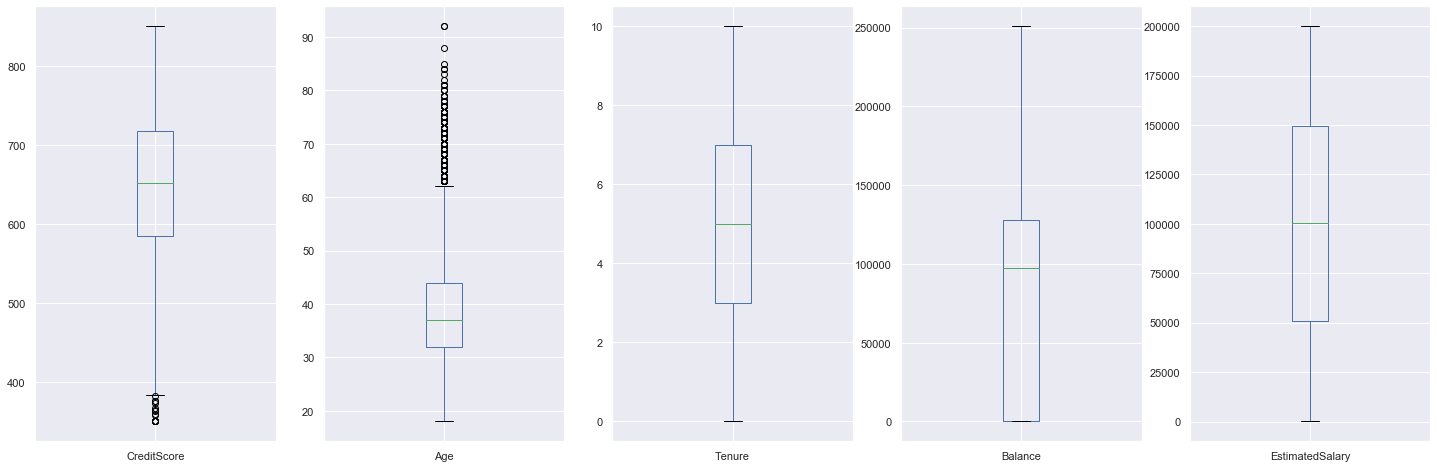

In [10]:
col = ["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]

sb.set(style = "darkgrid")
fig = plt.figure(figsize = (25,8))

for i in range(len(column)):
    plt.subplot(1, 5, i+1)
    datadrop.boxplot(column=[col[i]])

__Checking Outliers__ <br>
Look into `CreditScore` & `Age` data

In [39]:
cek = ["CreditScore", "Age"]

def cek_outlier(df, col_name):
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    low  = q1-1.5*iqr
    high = q3+1.5*iqr
    print(f"Lower limit {col_name} : {low}, & upper limit : {high}")

for i in cek:
    cek_outlier(datadrop, i)

Lower limit CreditScore : 383.0, & upper limit : 919.0
Lower limit Age : 14.0, & upper limit : 62.0


<hr>

## Creating Dummy Variable for Categorical Data 

In [12]:
dtGeo = pd.get_dummies(datadrop["Geography"])
dtGeo

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


In [13]:
dtGender = pd.get_dummies(datadrop["Gender"])
dtGender

,Female,Male
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
9995,0,1
9996,0,1
9997,1,0
9998,0,1


In [14]:
dtChurn = pd.concat([dtGeo, dtGender, datadrop], axis=1)
dtChurn.drop(["Geography", "Gender"], axis=1, inplace= True)
dtChurn

,France,Germany,Spain,Female,Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,0,0,1,0,619,42,2,0.00,1,1,1,101348.88,1
1,0,0,1,1,0,608,41,1,83807.86,1,0,1,112542.58,0
2,1,0,0,1,0,502,42,8,159660.80,3,1,0,113931.57,1
3,1,0,0,1,0,699,39,1,0.00,2,0,0,93826.63,0
4,0,0,1,1,0,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,0,0,1,771,39,5,0.00,2,1,0,96270.64,0
9996,1,0,0,0,1,516,35,10,57369.61,1,1,1,101699.77,0
9997,1,0,0,1,0,709,36,7,0.00,1,0,1,42085.58,1
9998,0,1,0,0,1,772,42,3,75075.31,2,1,0,92888.52,1


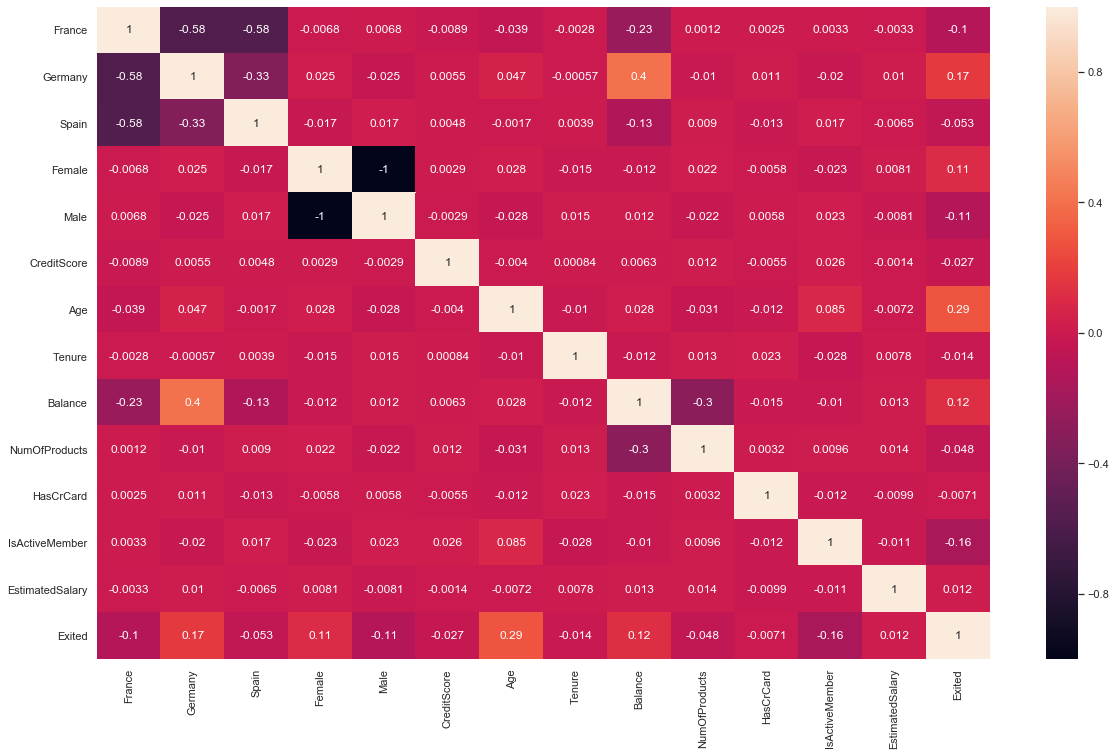

In [36]:
plt.figure(figsize= (20,12))
sb.heatmap(dtChurn.corr(method= "pearson"), annot= True)

In [35]:
dtChurn.corr(method= "pearson")["Exited"].sort_values()

IsActiveMember    -0.156128
Male              -0.106512
France            -0.104955
Spain             -0.052667
NumOfProducts     -0.047820
CreditScore       -0.027094
Tenure            -0.014001
HasCrCard         -0.007138
EstimatedSalary    0.012097
Female             0.106512
Balance            0.118533
Germany            0.173488
Age                0.285323
Exited             1.000000
Name: Exited, dtype: float64

Features that have big correlation : 
- `Age` (28.5%)
- `Germany`[Geography] (17.3%)
- `IsActiveMember` (15.6%)
- `NumofProducts` (12.5%)
- `Balance` (11.8%)
- `Male`/`Female`[Gender] (10.7%)

<hr>

## Exporting clean dataset to be predicted

In [17]:
dtChurn.to_csv("CM_Dummy.csv", index=False)